In [2]:
from SetTopol import TopolSettings
import numpy as np

In [3]:
top = TopolSettings(nx = 50, ny = 50, vol = 0.5, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)

In [5]:
# fixed on the left side + load on upper right downward
top.setf(value=1, node=51*50, teta=270)
top.setfixed(list_nodes=np.arange(0,51))
top.optimize(store=True)
top.plot()

it.: 1 , obj.: 122.849 Vol.: 0.500, ch.: 0.200
it.: 2 , obj.: 67.225 Vol.: 0.500, ch.: 0.200
it.: 3 , obj.: 44.583 Vol.: 0.500, ch.: 0.200
it.: 4 , obj.: 34.375 Vol.: 0.500, ch.: 0.200
it.: 5 , obj.: 29.718 Vol.: 0.500, ch.: 0.171
it.: 6 , obj.: 27.110 Vol.: 0.500, ch.: 0.137
it.: 7 , obj.: 25.887 Vol.: 0.500, ch.: 0.100
it.: 8 , obj.: 25.250 Vol.: 0.500, ch.: 0.073
it.: 9 , obj.: 24.872 Vol.: 0.500, ch.: 0.053
it.: 10 , obj.: 24.617 Vol.: 0.500, ch.: 0.049
it.: 11 , obj.: 24.430 Vol.: 0.500, ch.: 0.043
it.: 12 , obj.: 24.290 Vol.: 0.500, ch.: 0.035
it.: 13 , obj.: 24.186 Vol.: 0.500, ch.: 0.027
it.: 14 , obj.: 24.113 Vol.: 0.500, ch.: 0.019
it.: 15 , obj.: 24.062 Vol.: 0.500, ch.: 0.014
it.: 16 , obj.: 24.026 Vol.: 0.500, ch.: 0.011
it.: 17 , obj.: 24.001 Vol.: 0.500, ch.: 0.010
it.: 18 , obj.: 23.982 Vol.: 0.500, ch.: 0.008
it.: 19 , obj.: 23.968 Vol.: 0.500, ch.: 0.008
it.: 20 , obj.: 23.958 Vol.: 0.500, ch.: 0.007
it.: 21 , obj.: 23.949 Vol.: 0.500, ch.: 0.006
it.: 22 , obj.: 23.94

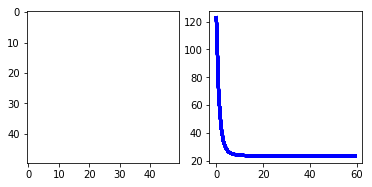

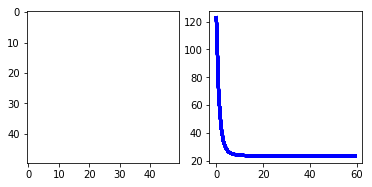

In [13]:
# fixed on the left side + load on bottom right downward
top.setf(value=1, node=51*51-1, teta=270)
top.setfixed(list_nodes=np.arange(0,51))
top.optimize(store=True)
top.plot()

it.: 1 , obj.: 168.767 Vol.: 0.500, ch.: 0.200
it.: 2 , obj.: 80.664 Vol.: 0.500, ch.: 0.200
it.: 3 , obj.: 48.506 Vol.: 0.500, ch.: 0.200
it.: 4 , obj.: 36.776 Vol.: 0.500, ch.: 0.200
it.: 5 , obj.: 33.039 Vol.: 0.500, ch.: 0.200
it.: 6 , obj.: 30.736 Vol.: 0.500, ch.: 0.189
it.: 7 , obj.: 29.655 Vol.: 0.500, ch.: 0.154
it.: 8 , obj.: 29.149 Vol.: 0.500, ch.: 0.106
it.: 9 , obj.: 28.878 Vol.: 0.500, ch.: 0.071
it.: 10 , obj.: 28.715 Vol.: 0.500, ch.: 0.048
it.: 11 , obj.: 28.607 Vol.: 0.500, ch.: 0.040
it.: 12 , obj.: 28.532 Vol.: 0.500, ch.: 0.035
it.: 13 , obj.: 28.477 Vol.: 0.500, ch.: 0.031
it.: 14 , obj.: 28.436 Vol.: 0.500, ch.: 0.027
it.: 15 , obj.: 28.403 Vol.: 0.500, ch.: 0.024
it.: 16 , obj.: 28.377 Vol.: 0.500, ch.: 0.022
it.: 17 , obj.: 28.355 Vol.: 0.500, ch.: 0.019
it.: 18 , obj.: 28.336 Vol.: 0.500, ch.: 0.017
it.: 19 , obj.: 28.320 Vol.: 0.500, ch.: 0.015
it.: 20 , obj.: 28.306 Vol.: 0.500, ch.: 0.014
it.: 21 , obj.: 28.294 Vol.: 0.500, ch.: 0.013
it.: 22 , obj.: 28.28

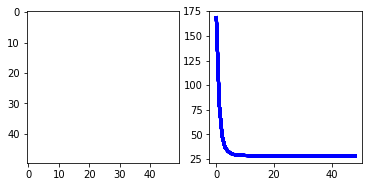

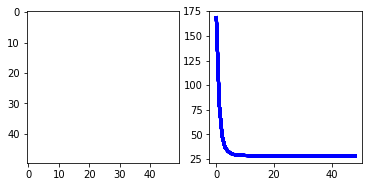

In [12]:
# fixed on the left side + load on bottom right with 45 degrees of inclination
top.setf(value=1, node=51*51-1, teta=45+180)
top.setfixed(list_nodes=np.arange(0,51))
top.optimize(store=True)
top.plot()

In [ ]:
# the plots are saved in the folder

### Generating the Dataset

In [35]:
top = TopolSettings(nx = 4, ny = 2, vol = 0.5, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + [m*(top.ny+1) for m in range(1,top.nx)] + np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1)).tolist() 
count = 0
fixed_part = ""
for node in possible_fixed_nodes:
    for list_nodes in [np.arange(0,top.ny+1).tolist(), [m*(top.ny+1) for m in range(0,top.nx+1)], [m*(top.ny +1)-1 for m in range(1,top.nx+2)], np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1)).tolist()]:
        for teta in [180+90]: # [45,90,180,180+45,180+90] with teta = 180+90 only we have 596 output_plot
            if node not in list_nodes: # i do not want to put load on a fixed edge
                count+=1
                top.setf(value=1, node=node, teta=teta)
                top.setfixed(list_nodes=list_nodes)
                top.optimize(store=True)
                top.plot()

In [27]:
count

596